In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import random
import os
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

/data1/hom1/ict17/.conda/envs/stargan-v2/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('./train.csv')
df['len'] = df['label'].str.len()

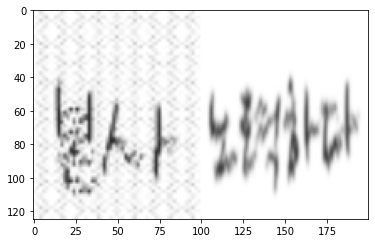

In [3]:
select1, select2 = random.randint(0, 76888), random.randint(0, 76888)
imgFile1 = f'./train/TRAIN_{select1:05d}.png'
imgFile2 = f'./train/TRAIN_{select2:05d}.png'


# 이미지 읽기
img1 = cv2.imread(imgFile1, 1);
img2 = cv2.imread(imgFile2, 1);

# 사이즈 조절
img1 = cv2.resize(img1,(100,125))
img2 = cv2.resize(img2,(100,125))

# 이미지 붙이기
addh = cv2.hconcat([img1, img2])
plt.imshow(addh)

In [4]:
os.makedirs("./Cut_mix", exist_ok=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76888 entries, 0 to 76887
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        76888 non-null  object
 1   img_path  76888 non-null  object
 2   label     76888 non-null  object
 3   len       76888 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
df_len_count = pd.DataFrame(df['len'].value_counts())
df_len_count.reset_index(inplace=True)
df_len_count.columns = ['len', 'len_count']

display(df_len_count)

,len,len_count
0,2,28631
1,1,23703
2,3,13514
3,4,9988
4,5,1026
5,6,26


In [7]:
len2count = {k:v for k,v in zip(df_len_count['len'], df_len_count['len_count'])}
len2count

{2: 28631, 1: 23703, 3: 13514, 4: 9988, 5: 1026, 6: 26}

In [9]:
## Data Augmentation
idx = 76888 
for i in tqdm(range(200000)):
    select1, select2 = random.randint(0, 76888), random.randint(0, 76888)
    imgFile1 = f'./train/TRAIN_{select1:05d}.png'
    imgFile2 = f'./train/TRAIN_{select2:05d}.png'
    
    if df['len'][select1] + df['len'][select2] > 6:
        continue
        
    if len2count[df['len'][select1] + df['len'][select2]] > 30000:
        continue
    
    # 이미지 읽기
    img1 = cv2.imread(imgFile1, 1);
    img2 = cv2.imread(imgFile2, 1);
    
    img1 = cv2.resize(img1,(100,125))
    img2 = cv2.resize(img2,(100,125))
    
    addh = cv2.hconcat([img1, img2])
    
    new_data = {
        'id' : f"TRAIN_{idx:06d}",
        'img_path' : f"./Cut_mix/TRAIN_{idx:06d}.png",
        'label' : df['label'][select1] + df['label'][select2],
        'len' : df['len'][select1] + df['len'][select2]
    }
    
    df = df.append(new_data, ignore_index=True)
    cv2.imwrite(f"./Cut_mix/TRAIN_{idx:06d}.png", addh)
    idx += 1
    len2count[df['len'][select1] + df['len'][select2]] += 1
    

100%|██████████| 200000/200000 [15:59<00:00, 208.41it/s]


In [10]:
len2count

{2: 30001, 1: 23703, 3: 30001, 4: 30001, 5: 30001, 6: 27168}

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170875 entries, 0 to 170874
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        170875 non-null  object
 1   img_path  170875 non-null  object
 2   label     170875 non-null  object
 3   len       170875 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.2+ MB


In [12]:
df_len_count = pd.DataFrame(df['len'].value_counts())
df_len_count.reset_index(inplace=True)
df_len_count.columns = ['len', 'len_count']

display(df_len_count)

,len,len_count
0,5,30001
1,4,30001
2,3,30001
3,2,30001
4,6,27168
5,1,23703


<AxesSubplot:xlabel='len', ylabel='len_count'>

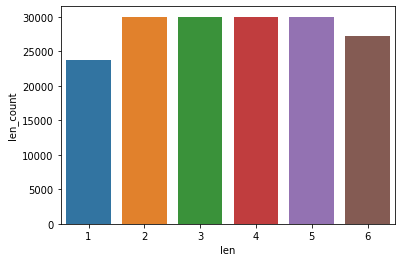

In [13]:
import seaborn as sns
sns.barplot(data=df_len_count, x='len', y='len_count')

In [14]:
df.to_csv("train.csv", mode='w', index=False)